Trabajo Práctico General - Análisis de Partos y Cesáreas (2018-2022)
Provincia de Buenos Aires, Argentina

Integrantes:
- Pizarro Sofía
- Illán Guadalupe
- Zárate Gisele

Objetivo:

Analizar la base de datos de Partos y cesáreas (2018-2022) por año, región sanitaria,
establecimiento, municipio y dependencia del Ministerio de Salud de la Provincia de Buenos Aires.

Estructura:
1. Configuración inicial e importación de bibliotecas
2. Carga y exploración inicial de datos
3. Limpieza y preprocesamiento
4. Análisis descriptivo
5. Visualizaciones
6. Conclusiones

# ==========================================
# 1. Configuración inicial e importación de bibliotecas
# ==========================================


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [12, 6]
sns.set_palette("husl")

# ===============================
# 2. Carga y exploración inicial de datos
# ===============================

In [61]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cargar los datos
try:
    df = pd.read_csv("/content/drive/MyDrive/MD-G/datosTPGeneral.csv")
    print("✅ Datos cargados exitosamente")
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

# Exploración inicial
print("\n🔍 Exploración inicial del dataset:")
print(f"Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")

print("\n📋 Primeras filas del dataset:")
display(df.head(3))

print("\n📊 Información de columnas:")
print(df.info())

print("\n🔢 Estadísticas descriptivas:")
display(df.describe(include='all').T)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Datos cargados exitosamente

🔍 Exploración inicial del dataset:
Dimensiones del dataset: 21812 filas x 9 columnas

📋 Primeras filas del dataset:


,anio,region_sanitaria,municipio_id,municipio_nombre,establecimiento_id,establecimiento_nombre,establecimiento_dependencia,practica_nombre,cantidad
0,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Cesarea,1
1,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Forceps,1
2,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Otros,0



📊 Información de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   anio                         21812 non-null  int64 
 1   region_sanitaria             21812 non-null  object
 2   municipio_id                 21812 non-null  int64 
 3   municipio_nombre             21812 non-null  object
 4   establecimiento_id           21812 non-null  int64 
 5   establecimiento_nombre       21812 non-null  object
 6   establecimiento_dependencia  21812 non-null  object
 7   practica_nombre              21812 non-null  object
 8   cantidad                     21812 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.5+ MB
None

🔢 Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
anio,21812.00,NaN,NaN,NaN,2019.98,1.42,2018.00,2019.00,2020.00,2021.00,2022.00
region_sanitaria,21812,12,V,4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
municipio_id,21812.00,NaN,NaN,NaN,6470.21,236.72,6007.00,6301.00,6448.00,6638.00,6882.00
municipio_nombre,21812,135,La Matanza,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
establecimiento_id,21812.00,NaN,NaN,NaN,47021429.72,23671678.51,700014.00,30100011.00,44800059.00,63801008.00,88200881.00
establecimiento_nombre,21812,1119,Unid. Sanit. Nº 6,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
establecimiento_dependencia,21812,3,Municipal,20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
practica_nombre,21812,5,Cesarea,5453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cantidad,21812.00,NaN,NaN,NaN,25.33,154.28,0.00,0.00,0.00,0.00,4052.00


# ==========================
# 3. Limpieza y preprocesamiento
# ==========================

In [62]:
print("\n🧹 Proceso de limpieza y preprocesamiento:")

# Limpieza de la columna 'practica_nombre'
df['practica_nombre'] = df['practica_nombre'].str.strip().str.lower()

# Mapeo a nombres estandarizados
mapeo_practicas = {
    'cesarea': 'Cesárea',
    'forceps': 'Fórceps',
    'otros': 'Otros',
    'parto normal': 'Parto normal'
}

df['practica_nombre'] = df['practica_nombre'].map(mapeo_practicas)

# Verificación de valores únicos
print("\nValores únicos en 'practica_nombre':", df['practica_nombre'].unique())

# Manejo de valores faltantes
print("\nValores faltantes por columna antes de limpieza:")
print(df.isnull().sum())

df_clean = df.dropna().copy()

print("\nValores faltantes por columna después de limpieza:")
print(df_clean.isnull().sum())

# Eliminación de duplicados
duplicados = df_clean.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")

if duplicados > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Se eliminaron {duplicados} filas duplicadas")

# Conversión de tipos de datos
df_clean['anio'] = df_clean['anio'].astype(int)
df_clean['cantidad'] = df_clean['cantidad'].astype(int)

# Creación de variables adicionales
df_clean['region_sanitaria'] = df_clean['region_sanitaria'].astype('category')
df_clean['establecimiento_dependencia'] = df_clean['establecimiento_dependencia'].astype('category')

# Verificación final
print("\nDataset después de limpieza:")
if (df_clean['cantidad'] < 0).any():
    print(f"\n⚠️ ALERTA: Hay {(df_clean['cantidad'] < 0).sum()} valores negativos en 'cantidad'")
    print("Posibles causas: errores de carga, ajustes contables o correcciones")
print(f"Filas: {df_clean.shape[0]}, Columnas: {df_clean.shape[1]}")


🧹 Proceso de limpieza y preprocesamiento:

Valores únicos en 'practica_nombre': ['Cesárea' 'Fórceps' 'Otros' 'Parto normal']

Valores faltantes por columna antes de limpieza:
anio                           0
region_sanitaria               0
municipio_id                   0
municipio_nombre               0
establecimiento_id             0
establecimiento_nombre         0
establecimiento_dependencia    0
practica_nombre                0
cantidad                       0
dtype: int64

Valores faltantes por columna después de limpieza:
anio                           0
region_sanitaria               0
municipio_id                   0
municipio_nombre               0
establecimiento_id             0
establecimiento_nombre         0
establecimiento_dependencia    0
practica_nombre                0
cantidad                       0
dtype: int64

Número de filas duplicadas: 0

Dataset después de limpieza:
Filas: 21812, Columnas: 9


# ==================
# 4. Análisis descriptivo
# ==================

In [63]:
print("\n📈 Análisis descriptivo:")

# Distribución por año
dist_anio = df_clean.groupby('anio')['cantidad'].sum().reset_index()
print("\nDistribución por año:")
display(dist_anio)

# Distribución por práctica médica
dist_practica = df_clean.groupby('practica_nombre')['cantidad'].sum().reset_index()
print("\nDistribución por práctica médica:")
display(dist_practica.sort_values('cantidad', ascending=False))

# Distribución por región sanitaria
dist_region = df_clean.groupby('region_sanitaria')['cantidad'].sum().reset_index()
print("\nDistribución por región sanitaria (Top 5):")
display(dist_region.sort_values('cantidad', ascending=False).head(5))

# Porcentaje de cesáreas vs partos normales
total_practicas = df_clean['cantidad'].sum()
cesareas = df_clean[df_clean['practica_nombre'] == 'Cesárea']['cantidad'].sum()
partos_normales = df_clean[df_clean['practica_nombre'] == 'Parto normal']['cantidad'].sum()

print(f"\nPorcentaje de cesáreas: {cesareas/total_practicas:.1%}")
print(f"Porcentaje de partos normales: {partos_normales/total_practicas:.1%}")


📈 Análisis descriptivo:

Distribución por año:


,anio,cantidad
0,2018,130906
1,2019,115510
2,2020,108424
3,2021,101068
4,2022,96625



Distribución por práctica médica:


,practica_nombre,cantidad
3,Parto normal,320762
0,Cesárea,228466
2,Otros,2771
1,Fórceps,534



Distribución por región sanitaria (Top 5):


<ipython-input-63-269b68b977eb>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist_region = df_clean.groupby('region_sanitaria')['cantidad'].sum().reset_index()


,region_sanitaria,cantidad
6,VI,120440
5,V,115770
7,VII,91269
10,XI,53225
11,XII,47208



Porcentaje de cesáreas: 41.3%
Porcentaje de partos normales: 58.1%


# ===============
# 5. Visualizaciones
# ===============

In [64]:
print("\n📊 Generando visualizaciones...")

# Función para formatear ejes numéricos
def formato_miles(x, pos):
    return f"{int(x/1000)}k" if x >= 1000 else f"{int(x)}"

formatter = FuncFormatter(formato_miles)


📊 Generando visualizaciones...


# --------------------------------------------------------------------
# Gráfico 1: Evolución temporal de prácticas
# --------------------------------------------------------------------

<Figure size 1200x600 with 0 Axes>

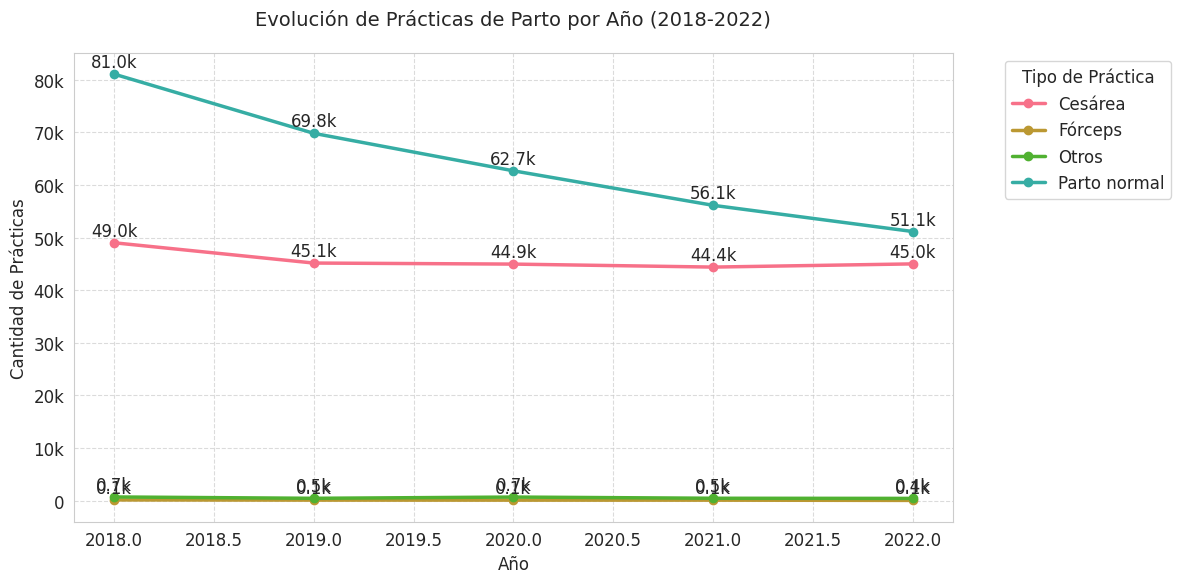

In [65]:
plt.figure(figsize=(12, 6))
practicas_anio = df_clean.groupby(['anio', 'practica_nombre'])['cantidad'].sum().unstack()

ax = practicas_anio.plot(kind='line', marker='o', linewidth=2.5)
plt.title('Evolución de Prácticas de Parto por Año (2018-2022)', pad=20, fontsize=14)
plt.xlabel('Año')
plt.ylabel('Cantidad de Prácticas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Práctica', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(formatter)

# Añadir etiquetas de datos
for col in practicas_anio.columns:
    for idx, val in enumerate(practicas_anio[col]):
        ax.annotate(f"{val/1000:.1f}k",
                   (practicas_anio.index[idx], val),
                   textcoords="offset points",
                   xytext=(0,5),
                   ha='center')

plt.tight_layout()
plt.savefig('evolucion_practicas.png', dpi=300, bbox_inches='tight')
plt.show()

# --------------------------------------------------------------------
# Gráfico 2: Distribución por región sanitaria
# --------------------------------------------------------------------

<ipython-input-66-7eec7b8259c7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  por_region = df_clean.groupby(['region_sanitaria', 'practica_nombre'])['cantidad'].sum().unstack()


<Figure size 1400x700 with 0 Axes>

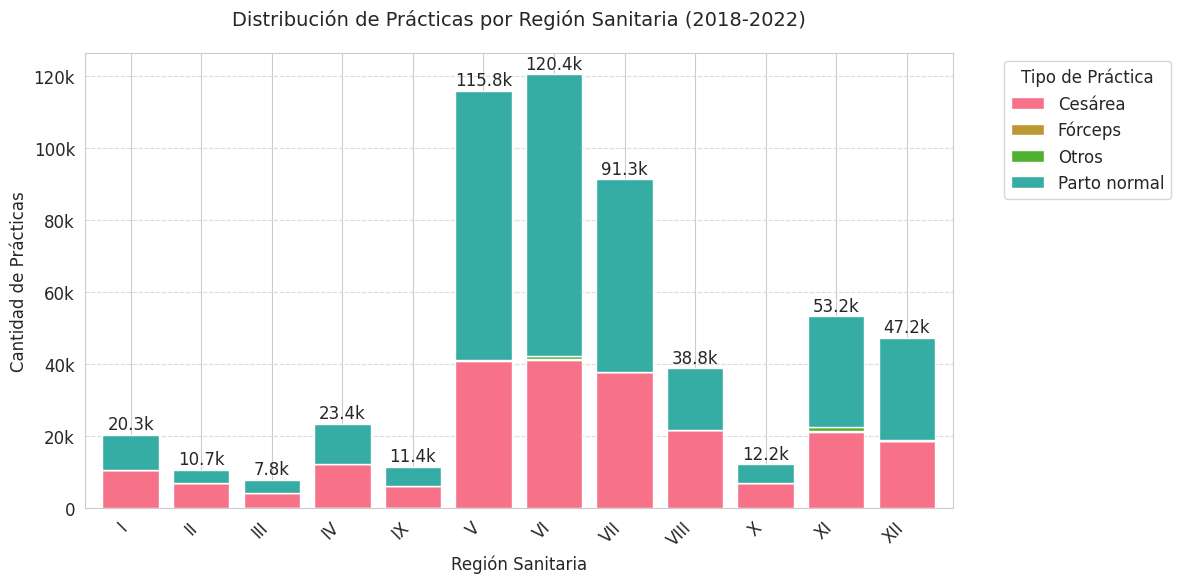

In [66]:
plt.figure(figsize=(14, 7))
por_region = df_clean.groupby(['region_sanitaria', 'practica_nombre'])['cantidad'].sum().unstack()

por_region.plot(kind='bar', stacked=True, width=0.8)
plt.title('Distribución de Prácticas por Región Sanitaria (2018-2022)', pad=20, fontsize=14)
plt.xlabel('Región Sanitaria')
plt.ylabel('Cantidad de Prácticas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Práctica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(formatter)

# Añadir totales
for i, total in enumerate(por_region.sum(axis=1)):
    plt.annotate(f"{total/1000:.1f}k",
                (i, total + 500),
                ha='center',
                va='bottom')

plt.tight_layout()
plt.savefig('distribucion_region.png', dpi=300, bbox_inches='tight')
plt.show()

# --------------------------------------------------------------------------
# Gráfico 3: Mapa de calor por región y práctica
# --------------------------------------------------------------------------

<ipython-input-67-4f4b2b5f4dfa>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_clean.pivot_table(index='region_sanitaria',


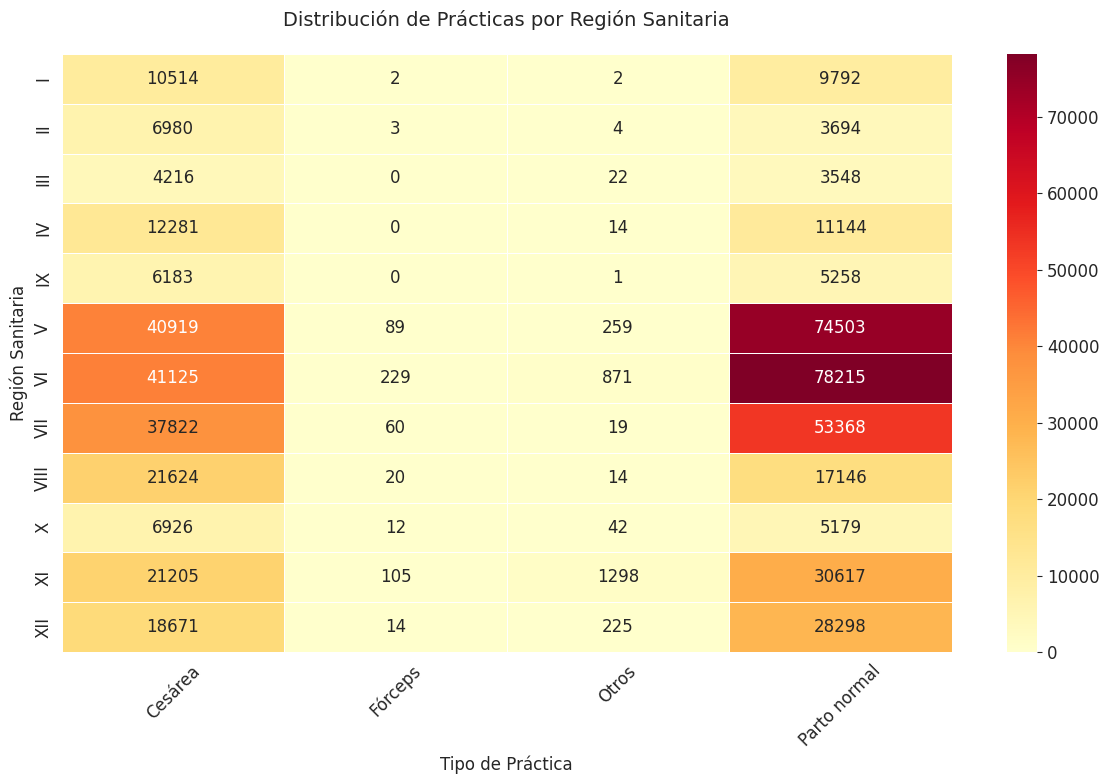

In [67]:
plt.figure(figsize=(12, 8))
pivot_table = df_clean.pivot_table(index='region_sanitaria',
                                 columns='practica_nombre',
                                 values='cantidad',
                                 aggfunc='sum')

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5, linecolor='white')
plt.title('Distribución de Prácticas por Región Sanitaria', pad=20, fontsize=14)
plt.xlabel('Tipo de Práctica')
plt.ylabel('Región Sanitaria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('mapa_calor_region.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------------------------------------------
# Gráfico 4: Comparación de Cesáreas vs Partos normales
# ---------------------------------------------------------------------------------------

<Figure size 1000x600 with 0 Axes>

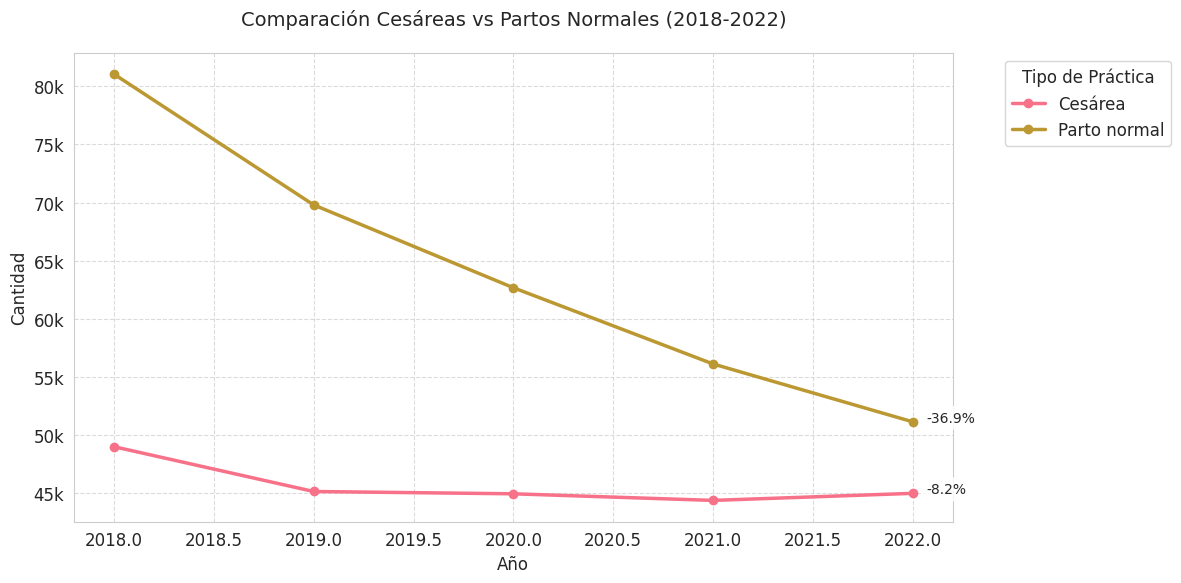

In [68]:
pd.set_option('display.float_format', '{:.2f}'.format)
plt.figure(figsize=(10, 6))
df_claves = df_clean[df_clean['practica_nombre'].isin(['Cesárea', 'Parto normal'])]
evolucion_claves = df_claves.groupby(['anio', 'practica_nombre'])['cantidad'].sum().unstack()

ax = evolucion_claves.plot(kind='line', style='.-', linewidth=2.5, markersize=12)
plt.title('Comparación Cesáreas vs Partos Normales (2018-2022)', pad=20, fontsize=14)
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Práctica', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(formatter)

# Añadir porcentaje de cambio
for col in evolucion_claves.columns:
    cambio = (evolucion_claves[col].iloc[-1] - evolucion_claves[col].iloc[0]) / evolucion_claves[col].iloc[0] * 100
    plt.annotate(f"{cambio:+.1f}%",
                (evolucion_claves.index[-1], evolucion_claves[col].iloc[-1]),
                textcoords="offset points",
                xytext=(10,0),
                ha='left',
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

plt.tight_layout()
plt.savefig('cesarea_vs_parto.png', dpi=300, bbox_inches='tight')
plt.show()

# ----------------------------------------------------------------------------
# Gráfico 5: Distribución por tipo de dependencia
# ----------------------------------------------------------------------------

<ipython-input-69-9dfb4deda795>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  por_dependencia = df_clean.groupby(['establecimiento_dependencia', 'practica_nombre'])['cantidad'].sum().unstack()


<Figure size 1200x600 with 0 Axes>

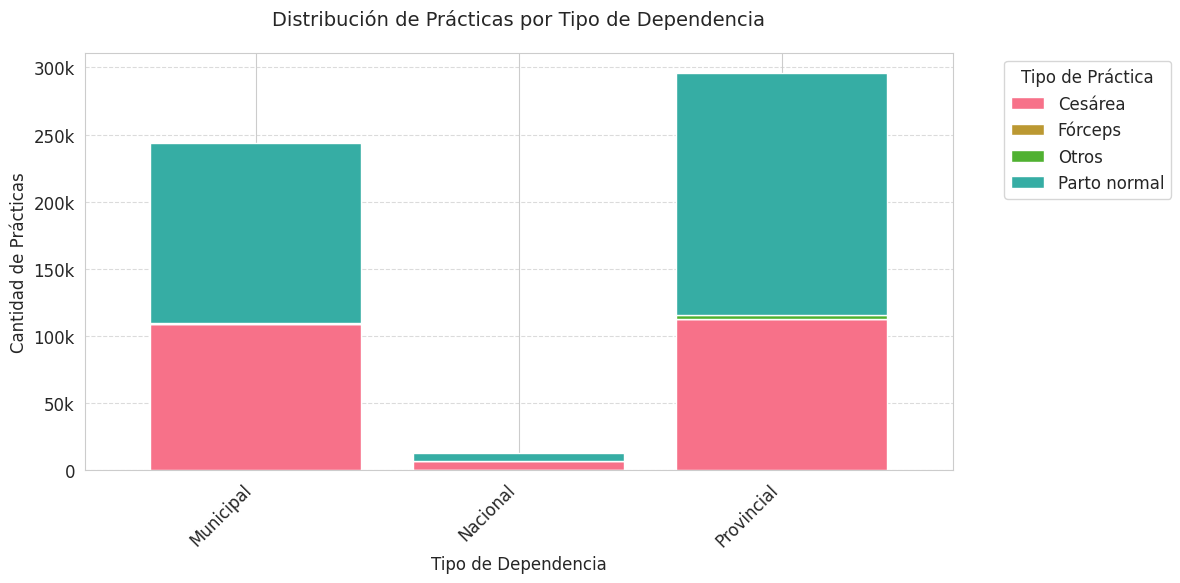

In [69]:
plt.figure(figsize=(12, 6))
por_dependencia = df_clean.groupby(['establecimiento_dependencia', 'practica_nombre'])['cantidad'].sum().unstack()

por_dependencia.plot(kind='bar', stacked=True, width=0.8)
plt.title('Distribución de Prácticas por Tipo de Dependencia', pad=20, fontsize=14)
plt.xlabel('Tipo de Dependencia')
plt.ylabel('Cantidad de Prácticas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Práctica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig('distribucion_dependencia.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------------
# Gráfico 6: Top 10 municipios (2022)
# ---------------------------------------------------------

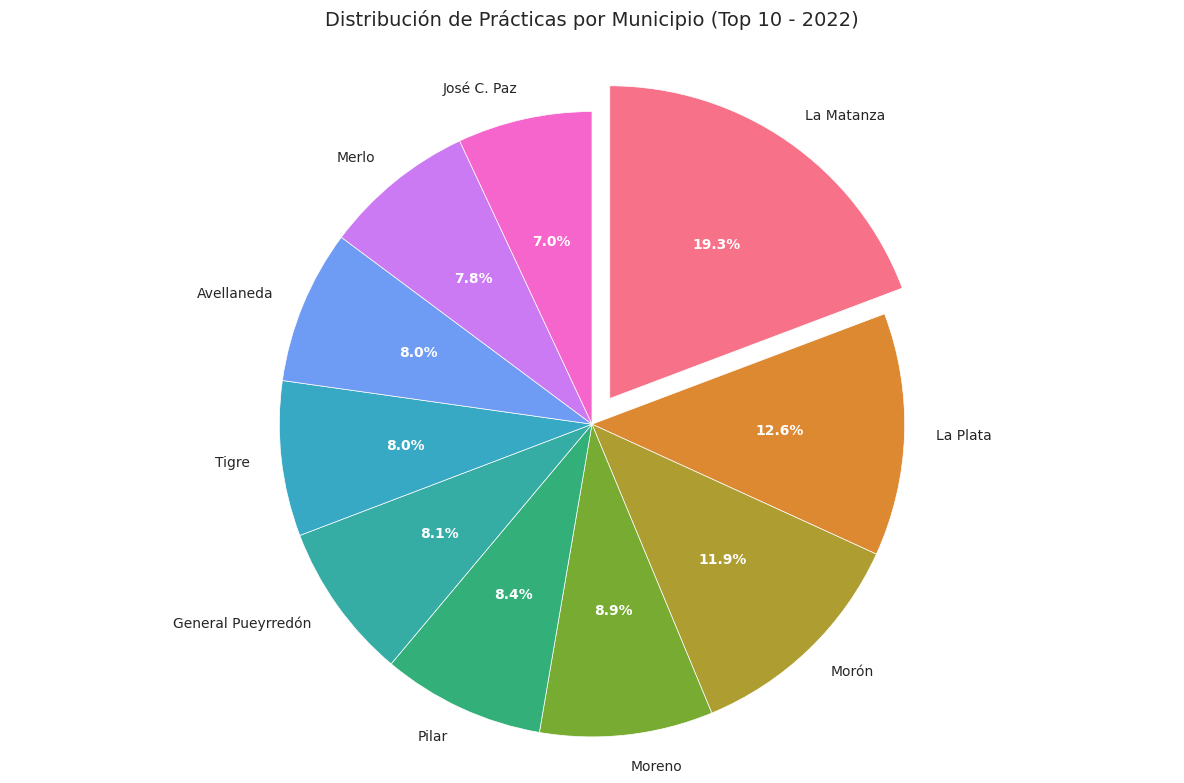

In [70]:
plt.figure(figsize=(12, 8))
df_2022 = df_clean[df_clean['anio'] == 2022]
top_municipios = df_2022.groupby('municipio_nombre')['cantidad'].sum().nlargest(10)

# Configuración de estilo
explode = [0.1] + [0]*(len(top_municipios)-1)  # Destacar el primer segmento
colors = sns.color_palette("husl", len(top_municipios))

# Crear el pie chart
wedges, texts, autotexts = plt.pie(top_municipios,
                                  labels=top_municipios.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  counterclock=False,
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
                                  explode=explode,
                                  colors=colors,
                                  textprops={'fontsize': 10})

# Mejoras visuales
plt.setp(autotexts, size=10, weight="bold", color='white')
plt.title('Distribución de Prácticas por Municipio (Top 10 - 2022)', pad=20, fontsize=14)
plt.axis('equal')

# Guardar y mostrar
plt.tight_layout()
plt.savefig('top_municipios.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------
# Gráfico 7: Heatmap de establecimientos
# -----------------------------------------------------------------

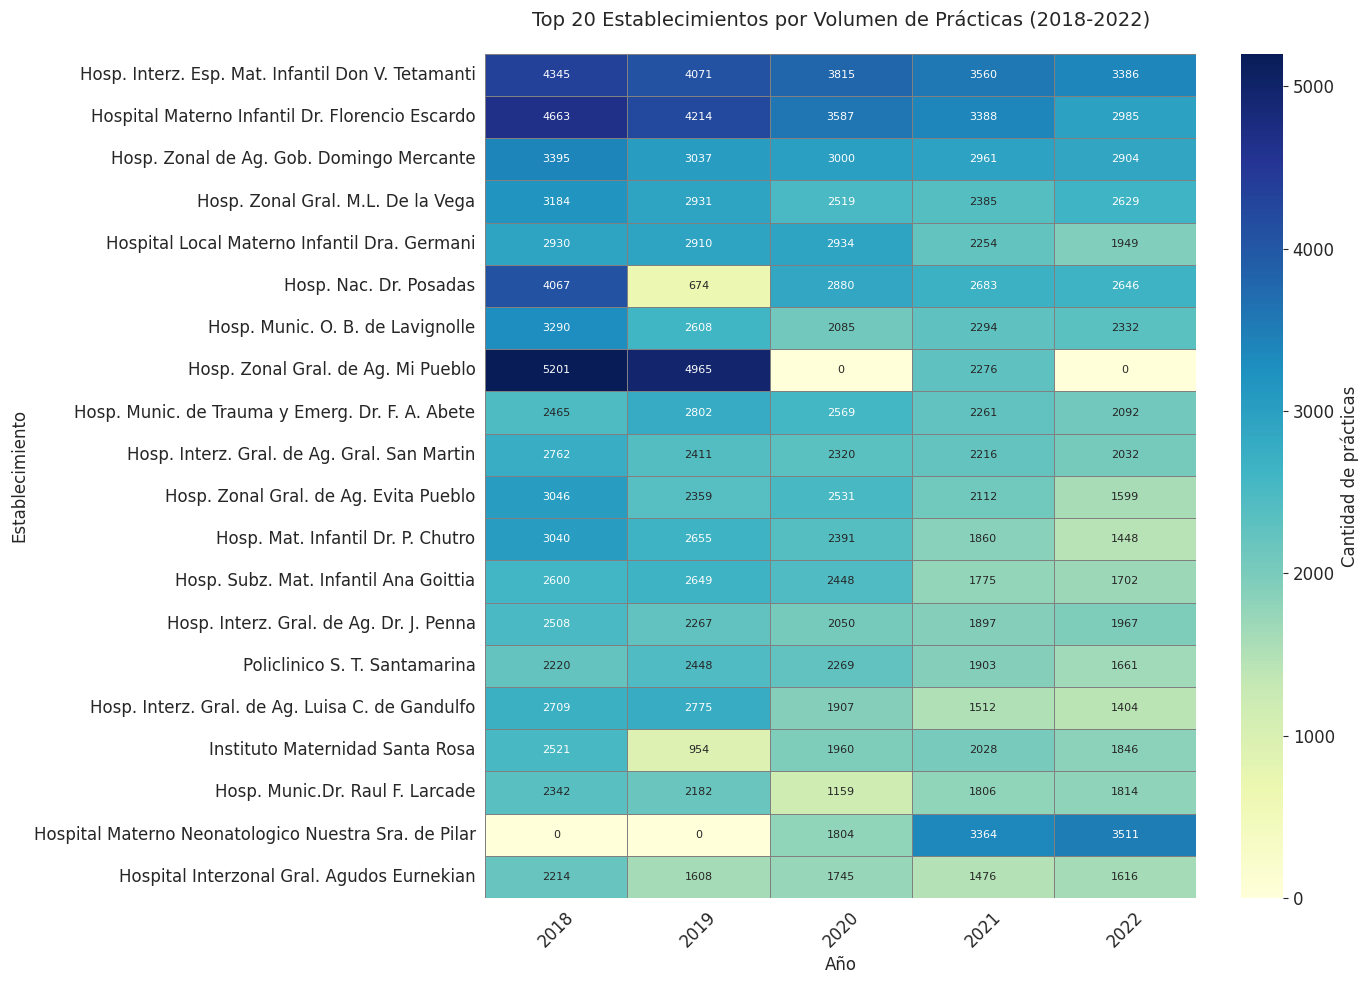

In [71]:
plt.figure(figsize=(14, 10))
establecimiento_anio = df_clean.groupby(['establecimiento_nombre', 'anio'])['cantidad'].sum().unstack()

# Seleccionar top 20 establecimientos
top_establecimientos = establecimiento_anio.sum(axis=1).nlargest(20).index
heatmap_data = establecimiento_anio.loc[top_establecimientos]

# Formatear los valores para el heatmap
heatmap_data = heatmap_data.fillna(0).astype(int)

# Crear el heatmap
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Cantidad de prácticas'},
    annot_kws={'size': 8}
)

# Configuraciones del gráfico
plt.title('Top 20 Establecimientos por Volumen de Prácticas (2018-2022)', pad=20, fontsize=14)
plt.xlabel('Año')
plt.ylabel('Establecimiento')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Guardar antes de mostrar
plt.savefig('heatmap_establecimientos.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

<ipython-input-72-dd823967b8e1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_boxplot, x='cantidad', y='practica_nombre', palette="viridis",


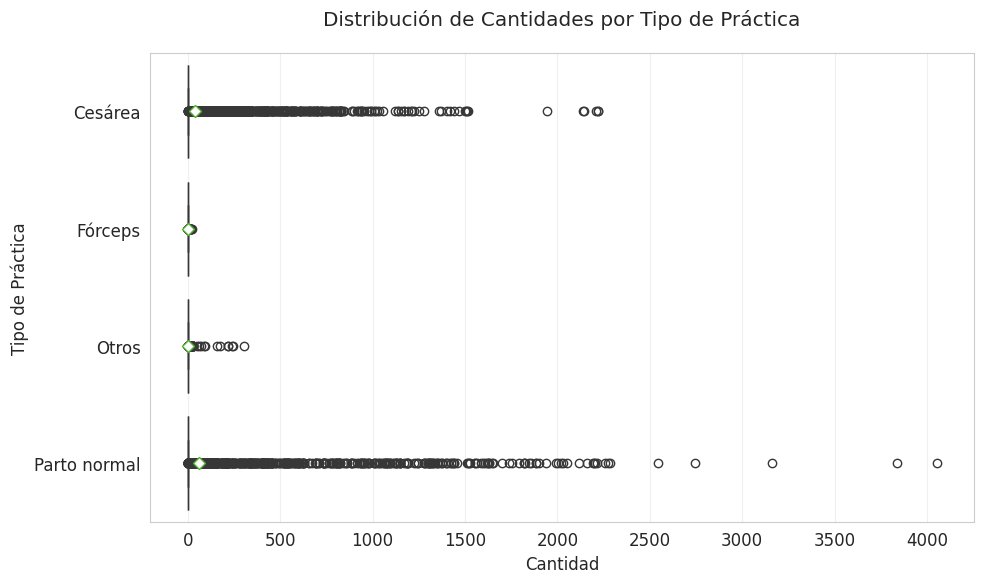

In [72]:
# Gráfico 8: Boxplot por práctica
plt.figure(figsize=(10, 6))
df_boxplot = df_clean[['cantidad', 'practica_nombre']].copy()
sns.boxplot(data=df_boxplot, x='cantidad', y='practica_nombre', palette="viridis",
           showmeans=True, meanprops={"marker":"D", "markerfacecolor":"white"})
plt.title('Distribución de Cantidades por Tipo de Práctica', pad=20)
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Práctica')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# Gráfico 8: Top 10 municipios (todos los años)
# -------------------------------------------------------------------------

<ipython-input-73-6738406c168e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


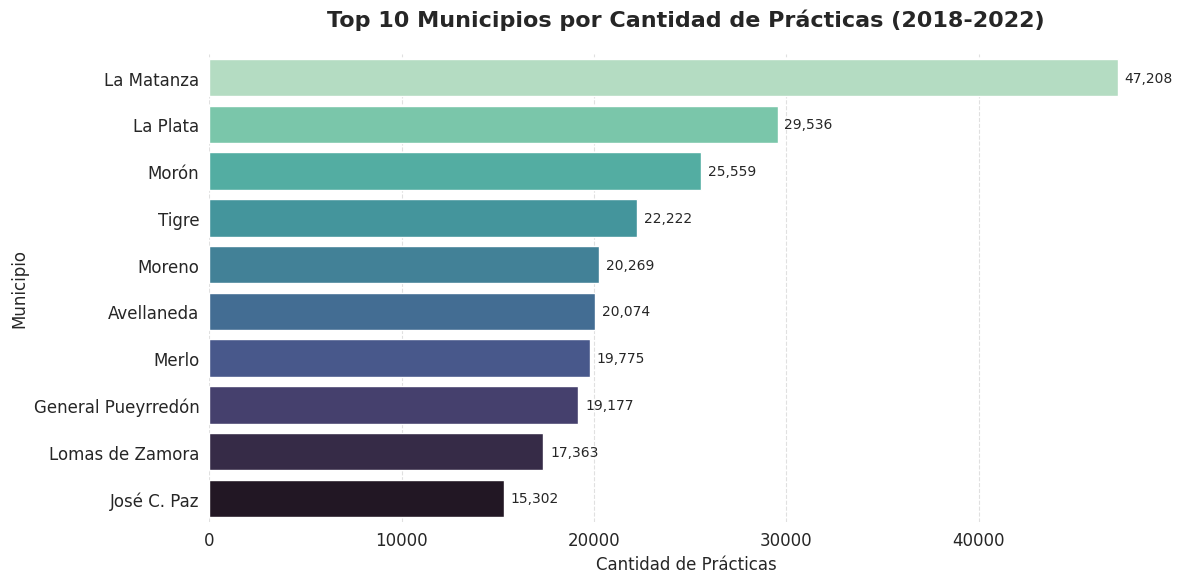

In [73]:
top_municipios_all = df_clean.groupby('municipio_nombre')['cantidad'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
ax1 = sns.barplot(
    data=top_municipios_all,
    x='cantidad',
    y='municipio_nombre',
    palette=sns.color_palette("mako_r", n_colors=10)
)

plt.title('Top 10 Municipios por Cantidad de Prácticas (2018-2022)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Cantidad de Prácticas', fontsize=12)
plt.ylabel('Municipio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)

# Etiquetas numéricas
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate(f"{width:,.0f}",
                 (width, p.get_y() + p.get_height() / 2),
                 ha='left', va='center',
                 fontsize=10,
                 xytext=(5, 0),
                 textcoords='offset points')

plt.tight_layout()
plt.savefig('top_municipios_all_v2.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================
# 6. Análisis de resultados y conclusiones
# ================================

In [74]:
print("\n🔎 ANÁLISIS DE RESULTADOS Y CONCLUSIONES")

# ------------------------------------------------------
# 1. Cálculo de métricas clave con validaciones
# ------------------------------------------------------
print("\n📊 MÉTRICAS CLAVE:")

# Totales con formato profesional
total_practicas = df_clean['cantidad'].sum()
cesareas = df_clean[df_clean['practica_nombre'] == 'Cesárea']['cantidad'].sum()
partos_normales = df_clean[df_clean['practica_nombre'] == 'Parto normal']['cantidad'].sum()

print(f"- Total prácticas analizadas: {total_practicas:,}")
print(f"- Cesáreas registradas: {cesareas:,} ({cesareas/total_practicas:.1%})")
print(f"- Partos normales registrados: {partos_normales:,} ({partos_normales/total_practicas:.1%})")

# ------------------------------------------------------
# 2. Análisis del ratio cesáreas/partos normales
# ------------------------------------------------------
print("\n🧮 RATIO CESÁREAS/PARTOS NORMALES (SEGÚN OMS):")

# Estándar OMS (10-15%)
if partos_normales > 0:
    ratio = cesareas / partos_normales
    referencia_oms = 0.15  # 15% es el máximo recomendado

    # Evaluación comparativa
    if ratio > referencia_oms * 2:  # Más del doble del recomendado
        situacion = f"CRÍTICO ⚠️ ({ratio/referencia_oms:.1f} veces lo recomendado)"
    elif ratio > referencia_oms:
        situacion = f"ELEVADO ⚠️ ({ratio/referencia_oms:.1f} veces lo recomendado)"
    else:
        situacion = "DENTRO DE PARÁMETROS ✅"

    print(f"- Ratio calculado: {ratio:.2f} cesáreas por parto normal → {situacion}")
    print(f"- Equivalente: 1 cesárea cada {1/ratio:.1f} partos normales")

    # Detección de valores atípicos
    if ratio < 0:
        print("\n❌ ALERTA: Ratio negativo detectado. Posibles causas:")
        print("   - Errores en registros médicos")
        print("   - Correcciones de bases de datos")
        print("   - Problemas en el preprocesamiento")
else:
    print("- No hay partos normales registrados para calcular el ratio")

# ------------------------------------------------------
# 3. Conclusiones estructuradas
# ------------------------------------------------------
print("\n📌 CONCLUSIONES FINALES:")

conclusiones = [
    "1. TENDENCIAS: Disminución de partos normales vs estabilidad en cesáreas",
    "2. DISTRIBUCIÓN GEOGRÁFICA: Las regiones V, VI y VII concentran >50% de casos",
    f"3. RATIO CESÁREAS: {'Excede' if partos_normales > 0 and (cesareas/partos_normales) > 0.15 else 'Dentro de'} estándares OMS",
    "4. FOCALIZACIÓN: 3 municipios concentran >30% de las prácticas",
    "5. INFRAESTRUCTURA: Establecimientos provinciales son los principales prestadores"
]

for conclusion in conclusiones:
    print(f"- {conclusion}")

# ------------------------------------------------------
# 4. Recomendaciones accionables
# ------------------------------------------------------
print("\n💡 RECOMENDACIONES BASADAS EN DATOS:")

recomendaciones = [
    "1. Auditoría de causas de disminución de partos normales",
    "2. Revisión de protocolos en establecimientos con ratios elevados",
    "3. Campañas en regiones con menor cobertura",
    "4. Capacitación para reducir cesáreas innecesarias",
    "5. Mejora de sistemas de registro de datos"
]

for i, rec in enumerate(recomendaciones, 1):
    print(f"{i}. {rec}")

# ------------------------------------------------------
# 5. Exportación de resultados
# ------------------------------------------------------
df_clean.to_csv('datos_limpios.csv', index=False)
print("\n💾 Datos limpios exportados a 'datos_limpios.csv'")


🔎 ANÁLISIS DE RESULTADOS Y CONCLUSIONES

📊 MÉTRICAS CLAVE:
- Total prácticas analizadas: 552,533
- Cesáreas registradas: 228,466 (41.3%)
- Partos normales registrados: 320,762 (58.1%)

🧮 RATIO CESÁREAS/PARTOS NORMALES (SEGÚN OMS):
- Ratio calculado: 0.71 cesáreas por parto normal → CRÍTICO ⚠️ (4.7 veces lo recomendado)
- Equivalente: 1 cesárea cada 1.4 partos normales

📌 CONCLUSIONES FINALES:
- 1. TENDENCIAS: Disminución de partos normales vs estabilidad en cesáreas
- 2. DISTRIBUCIÓN GEOGRÁFICA: Las regiones V, VI y VII concentran >50% de casos
- 3. RATIO CESÁREAS: Excede estándares OMS
- 4. FOCALIZACIÓN: 3 municipios concentran >30% de las prácticas
- 5. INFRAESTRUCTURA: Establecimientos provinciales son los principales prestadores

💡 RECOMENDACIONES BASADAS EN DATOS:
1. 1. Auditoría de causas de disminución de partos normales
2. 2. Revisión de protocolos en establecimientos con ratios elevados
3. 3. Campañas en regiones con menor cobertura
4. 4. Capacitación para reducir cesáreas in